In [220]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import DataLoader
from thermography_dataset_one_layer import ThermDataset
%matplotlib inline

In [221]:
args = {'lr':0.01,
        'batch_size':32,
        'epochs':350,
        'noise':0.1,
        'train_size':0.7
        }

num_layers = 11

# Prepare Data

In [222]:
def get_dataloaders():    
    dataset = ThermDataset(fp='combined_data.xlsx', noise_scale=args['noise'])
    train_size = int(args['train_size'] * len(dataset))
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
    train_loader = DataLoader(train_dataset, shuffle=True, batch_size=args['batch_size'])
    test_loader = DataLoader(test_dataset, shuffle=True, batch_size=args['batch_size'])
    return train_loader, test_loader, train_dataset, test_dataset, dataset

In [223]:

train_loader, test_loader, train_dataset, test_dataset, dataset = get_dataloaders()
layers = list(range(1, num_layers+1))
print(layers)



_, input_size = dataset.spec.shape
_, output_size = dataset.temp.shape


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


# Design Models
(input size, output size, forward pass)

In [224]:
def create_model(input_size, output_size):
    class Net(nn.Module):
        def __init__(self, input_size, output_size):
            super(Net, self).__init__()
            self.lin1 = nn.Linear(input_size, 30)
            self.lin2 = nn.Linear(30, 45)
            self.lin3 = nn.Linear(45, 60)
            self.lin_fin = nn.Linear(60, output_size)


        def forward(self, x):
            output = F.relu(self.lin1(x))
            output = F.relu(self.lin2(output))
            output = F.relu(self.lin3(output))
            output = self.lin_fin(output)
            return output
        
    model = Net(input_size, output_size)
    return model

In [225]:
models = [create_model(input_size, output_size) for _ in range(num_layers)]

In [226]:
# n_samples = len(layers[0]['train data'])
# _, spec_size = layers[0]['data'].spec.shape
# _, temp_size = layers[0]['data'].temp.shape

# Training Loops

In [227]:
learning_rate = args['lr']
criterion = nn.MSELoss()
num_epochs = args['epochs']

loss_lists = {}
losses = {}
for layer in range(1, num_layers+1):
    list_name = "loss_list" + str(layer)
    loss_lists[list_name] = []

    layer_loss_name = "loss" + str(layer)
    losses[layer_loss_name] = 0

    optimizer = torch.optim.SGD(models[layer-1].parameters(), lr=learning_rate)

print(loss_lists["loss_list8"])

[]


In [228]:
# index = 0
# for temp_batch, spec_batch in train_loader:
#     actual = temp_batch[:,index].reshape(-1,1)
#     index += 1
# print(actual)

In [229]:
# for epoch in range(num_epochs):
#     for temp_batch, spec_batch in train_loader:
#         for layer in layers:
#             print(f'Layer {layer}')
#             if _index_ % num_layers == layer:
#                 # forward pass and loss
#                 temp_pred = models[layer-1](spec_batch)
#                 loss = criterion(temp_pred, temp_batch)

#                 # backward pass
#                 loss.backward()

#                 # update
#                 optimizer.step()

#                 # empty gradients
#                 optimizer.zero_grad()

#             loss_lists['loss_list'+str(layer)].append(loss.item())


for epoch in range(num_epochs):
    for index, (temp_batch, spec_batch) in enumerate(train_loader):
        for layer in layers:
            # print(f'Layer {layer}')
            if index % num_layers == layer:
                # forward pass and loss
                temp_pred = models[layer-1](spec_batch)
                losses["loss" + str(layer)] = criterion(temp_pred, temp_batch)

                # backward pass
                losses["loss" + str(layer)].backward()

                # update
                optimizer.step()

                # empty gradients
                optimizer.zero_grad()

                loss_lists['loss_list' + str(layer)].append(losses["loss" + str(layer)].item())

    # if (epoch+1) % int(num_epochs/10) == 0:
    #     print(f'epoch: {epoch+1}, loss = {loss}')


for layer in layers:
    average_loss = np.average(loss_lists['loss_list' + str(layer)])
    print(f'average loss of layer {layer}: {average_loss}\n')

torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([32, 11])
torch.Size([3

/Users/aidenkarpf/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/aidenkarpf/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [230]:
plt.plot(loss_list[50:])

plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

NameError: name 'loss_list' is not defined

# Testing

In [ ]:
import matplotlib.pyplot as plt

def plot_actual_vs_pred(pred, actual, index):
    actual_np = actual[index]
    pred_np = pred[index]


    plt.plot(actual_np, label='actual')
    plt.plot(pred_np, 'r+', label='predicted')

    plt.title("Layer 11")
    plt.xlabel("Layer")
    plt.ylabel("Temperature (K)")

    plt.legend()
    plt.show()

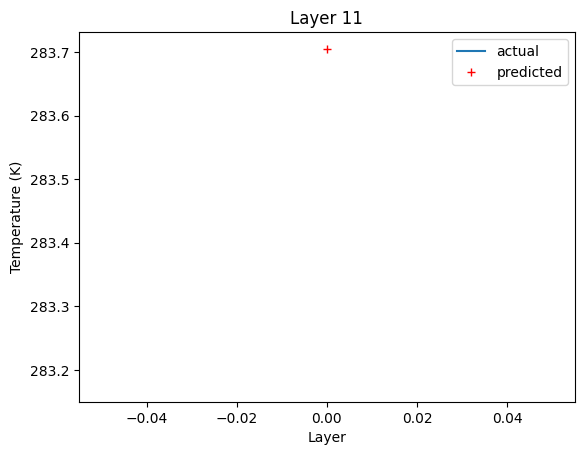

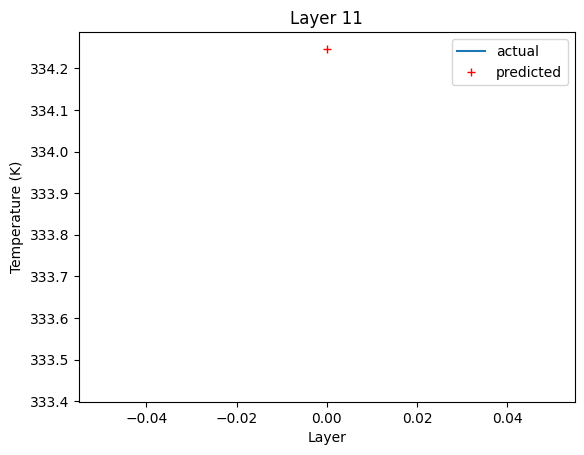

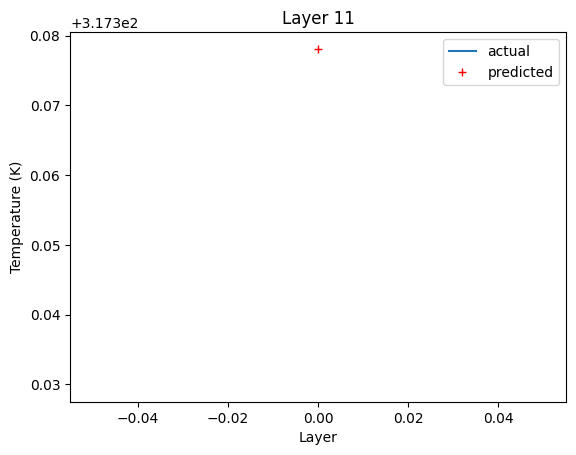

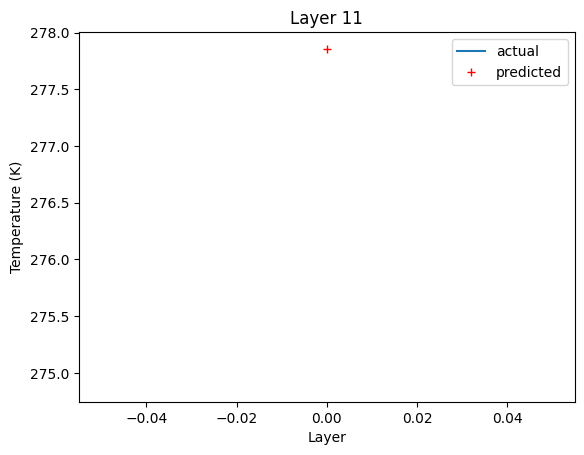

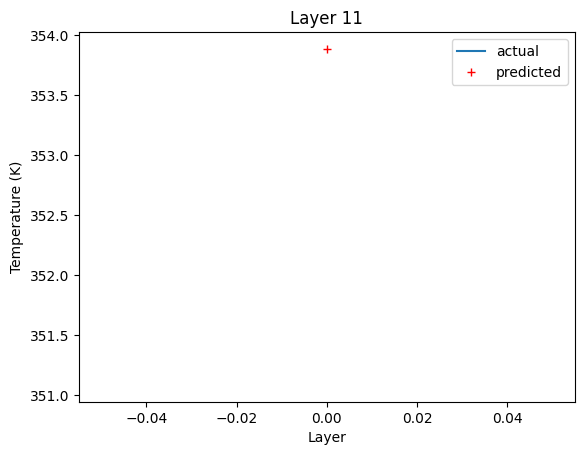

average loss: 3.3273595188603258


In [ ]:
total_loss = 0
n_samples = 0
total_batches = len(test_loader)
current_batch = 0

with torch.no_grad():
    for temp_batch, spec_batch in test_loader:
        temp_pred = model(spec_batch)
        loss = criterion(temp_pred, temp_batch)
        total_loss += loss.item() * len(temp_batch)
        n_samples += len(temp_batch)
        current_batch += 1

        if current_batch % int(total_batches/5) == 0:
            plot_actual_vs_pred(temp_pred.numpy(), temp_batch.numpy(), 0) 

average_loss = total_loss/n_samples
print(f"average loss: {average_loss}")